In [1]:
import pandas as pd
import numpy as np
from fastai.tabular.all import *
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
learn = load_learner('titanic_model_v7.pkl')


c:\Code\Local Code\titanic_survive\.venv\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [3]:
def modify_data():
    df = pd.read_csv('test.csv')
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Fare_log'] = np.log1p(df['Fare'])
    df['cabin_height'] = df['Cabin'].str[0].fillna('U')
    df['Embarked'] = df['Embarked'].fillna(0)
    procs = [Categorify, FillMissing, Normalize]
    cat_names  = ['Sex','Embarked','cabin_height']
    cont_names = ['Fare_log','Age','SibSp','Parch']
    return df

df = modify_data()

In [4]:
dls = learn.dls
cont_names = dls.cont_names

print(f"Continuous features: {cont_names}")

test_dl = learn.dls.test_dl(df)
probs,_ = learn.get_preds(dl=test_dl)
surv_probs = probs.squeeze()


Continuous features: ['Fare_log', 'Age', 'SibSp', 'Parch']


c:\Code\Local Code\titanic_survive\.venv\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


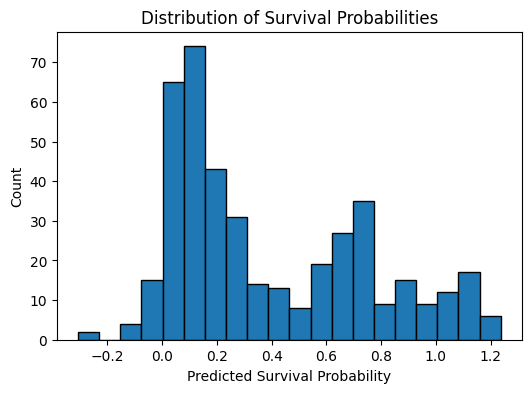

In [5]:
plt.figure(figsize=(6,4))
plt.hist(surv_probs.numpy(), bins=20, edgecolor='k')
plt.xlabel('Predicted Survival Probability')
plt.ylabel('Count')
plt.title('Distribution of Survival Probabilities')
plt.show()

In [6]:
y_pred_binary = (probs.squeeze() > 0.5).int()
submission = pd.DataFrame({
        'PassengerId': df['PassengerId'],
        'Survived': y_pred_binary.numpy()
    })
submission.to_csv("submissionv5.csv", index=False)
print(f"Submission saved to submission.csv")
print(f"Submission shape: {submission.shape}")
print(submission.head())
df.to_csv("processed_test_data.csv", index=False)


Submission saved to submission.csv
Submission shape: (418, 2)
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [7]:
survival_rate = submission['Survived'].mean()
print(f"Predicted Survival Rate: {survival_rate:.2f}")


Predicted Survival Rate: 0.36
